In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import data_load_data

mitbih_test = data_load_data.load_dataframe("train")
mitbih_train = data_load_data.load_dataframe("train")
ptbdb_abnormal = data_load_data.load_dataframe("abnormal")
ptbdb_normal = data_load_data.load_dataframe("normal")

We focus next on the ptbdb_abnormal and ptbdb_normal datasets.

In [2]:
display(ptbdb_abnormal.info())
display(ptbdb_normal.info())

print('ptbdb_abnormal null values: ', ptbdb_abnormal.isna().sum().sum())
print('ptbdb_normal null values: ', ptbdb_normal.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Columns: 188 entries, 9.322328567504882812e-01 to 1.000000000000000000e+00.1
dtypes: float64(188)
memory usage: 15.1 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Columns: 188 entries, 1.000000000000000000e+00 to 0.000000000000000000e+00.65
dtypes: float64(188)
memory usage: 5.8 MB


None

ptbdb_abnormal null values:  0
ptbdb_normal null values:  0


The datasets have the same number of columns, all of type float, and with no missing values.

Analysis of the data source tells us that the final column represents the heartbeat classification category, and the preceding columns represent a sample of the heartbeat taken at a sampling frequency of 125Hz, i.e. a sampling rate of every 8 milliseconds.

As with mitbih, the samples have been padded out with zeroes to ensure the fixed dimension of 188.

We now analyse the final columns of the datasets.

In [3]:
print(ptbdb_abnormal.iloc[:,-1].value_counts())
print(ptbdb_normal.iloc[:,-1].value_counts())

1.000000000000000000e+00.1
1.0    10505
Name: count, dtype: int64
0.000000000000000000e+00.65
0.0    4045
Name: count, dtype: int64


We see that ptbdb_abnormal takes value 1 in the final column, whereas ptbdb_normal takes value 0. This aligns with the mitbih dataset, insofar as 0 represented the normal category for a heartbeat.

It therefore makes sense to combine ptbdb_normal and ptbdb_abnormal for analysis, so that both normal and abnormal heartbeats are contained within one dataset, as with mitbih.

We first rename the columns to take values 0 through 187 for ease of joining. We then join the two datasets.

In [4]:
for df in [ptbdb_abnormal, ptbdb_normal]:
    df.columns = [i for i in range(len(df.columns))]

In [5]:
ptbdb = pd.concat([ptbdb_abnormal, ptbdb_normal])

We can now analyse the distribution of the target variable, i.e. column 187

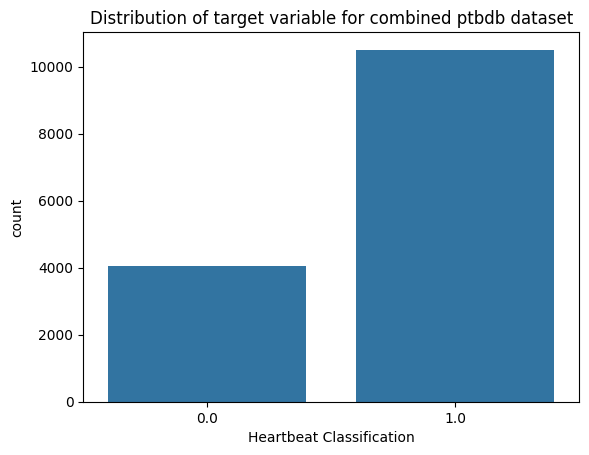

Proportion of class 0:  0.2780068728522337
Proportion of class 1:  0.7219931271477663


In [6]:
sns.countplot(x=ptbdb[187])
plt.title('Distribution of target variable for combined ptbdb dataset')
plt.xlabel('Heartbeat Classification')
plt.show();

prop0 = ptbdb[187].value_counts(normalize=True)[0] 
prop1 = ptbdb[187].value_counts(normalize=True)[1]
print('Proportion of class 0: ', prop0)
print('Proportion of class 1: ', prop1)

We see the data set has around 72% of samples of class 1 and 28% of class 0.

We will now consider what a random sample of heartbeats from each class looks like.

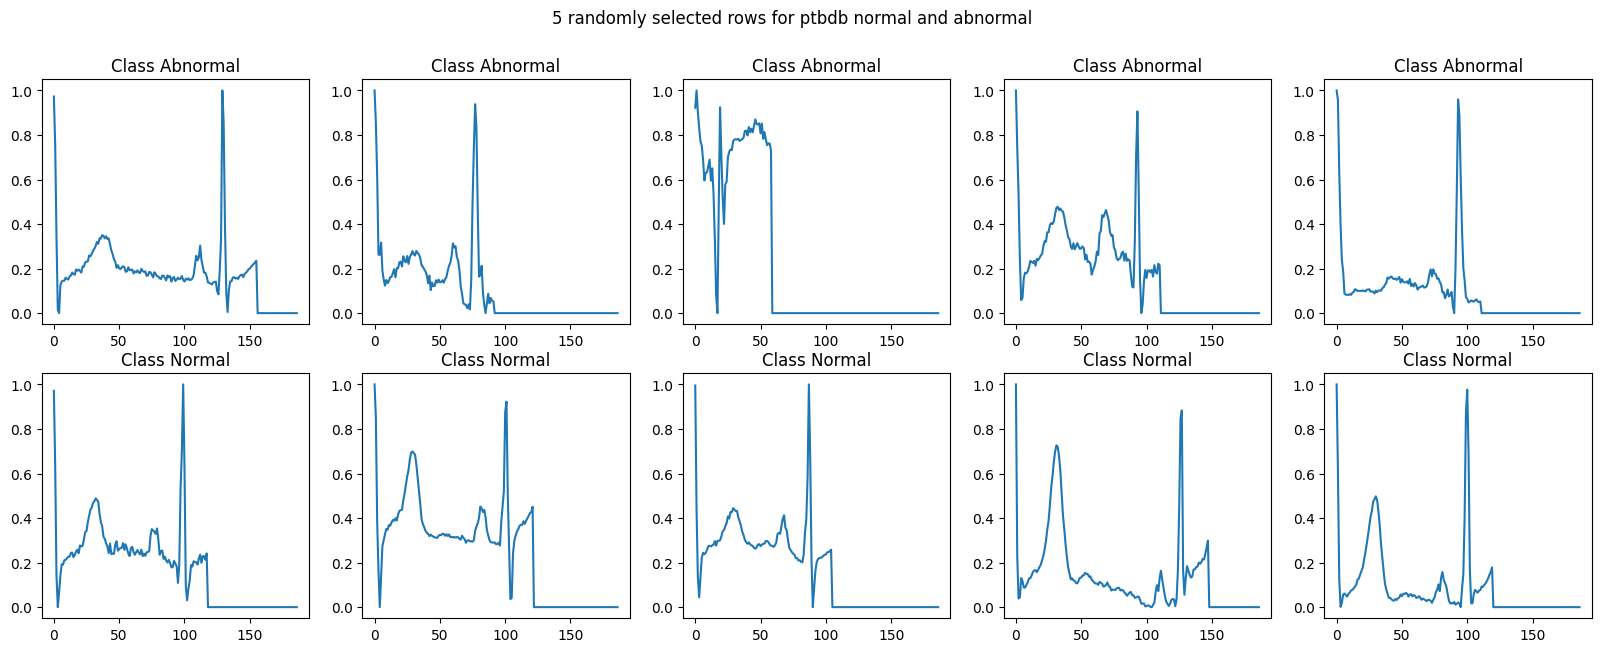

In [7]:
plt.figure(figsize=(20,7))
plt.suptitle('5 randomly selected rows for ptbdb normal and abnormal')

graph_index = 1

for label, df in [('Abnormal', ptbdb_abnormal.drop(187, axis=1)), ('Normal', ptbdb_normal.drop(187, axis=1))]:
    for _ in range(5):
        n = random.choice(df.index.values)
        plt.subplot(2 ,5, graph_index)
        plt.plot(df.columns, df.loc[n])
        plt.title(f'Class {label}')
        graph_index += 1

plt.show()

We can also consider the means of the two classes


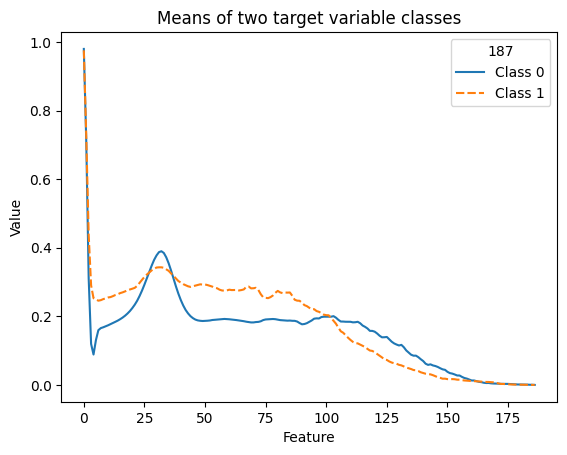

In [10]:
ptbdb_means = ptbdb.groupby(187).mean().T.rename(columns={0:'Class 0', 1:'Class 1'})

sns.lineplot(data=ptbdb_means)
plt.title('Means of two target variable classes')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show();

We can deduce from this that the mean of class 0 produces a more distinct curve than the mean of class 1, likely due to the larger number of samples of this class.